In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

In [3]:
contour_dist = np.load('/Users/linggeli/monte_carlo/examples/contour_dist.npy')

In [4]:
print(contour_dist.shape)

(20, 20, 200)


In [5]:
contour_thres = np.percentile(contour_dist, 90, axis=2)

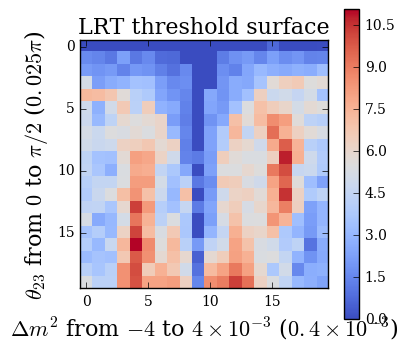

In [9]:
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(contour_thres, cmap='coolwarm', interpolation='nearest')
plt.colorbar(im)
plt.title('LRT threshold surface', fontsize=16)
plt.ylabel(r'$\theta_{23}$ from $0$ to $\pi/2$ ($0.025\pi$)', fontsize=16)
plt.xlabel(r'$\Delta m^2$ from $-4$ to $4\times10^{-3}$ ($0.4\times10^{-3}$)', fontsize=16)
plt.show()

In [10]:
contour_stat = np.load('/Users/linggeli/monte_carlo/examples/contour_stat.npy')

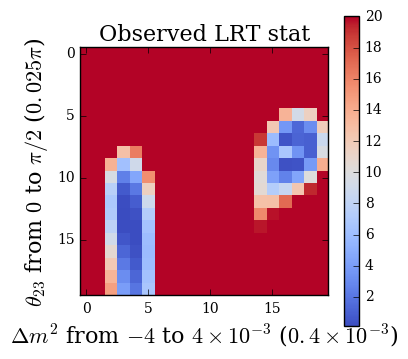

In [11]:
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(contour_stat, cmap='coolwarm', interpolation='nearest')
plt.colorbar(im)
plt.title('Observed LRT stat', fontsize=16)
plt.ylabel(r'$\theta_{23}$ from $0$ to $\pi/2$ ($0.025\pi$)', fontsize=16)
plt.xlabel(r'$\Delta m^2$ from $-4$ to $4\times10^{-3}$ ($0.4\times10^{-3}$)', fontsize=16)
plt.show()

In [12]:
from utils import grid_to_data

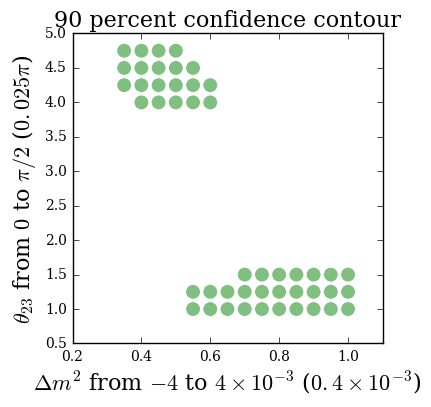

In [14]:
fig = plt.figure(figsize=(4, 4))
conf_array = grid_to_data(contour_stat < contour_thres)
conf_array = conf_array[conf_array[:, 2] == 1, :2]
plt.scatter(conf_array[:, 0], conf_array[:, 1], c='g', s=100, alpha=0.5, edgecolor='none')
plt.title('90 percent confidence contour', fontsize=16)
plt.ylabel(r'$\theta_{23}$ from $0$ to $\pi/2$ ($0.025\pi$)', fontsize=16)
plt.xlabel(r'$\Delta m^2$ from $-4$ to $4\times10^{-3}$ ($0.4\times10^{-3}$)', fontsize=16)
plt.show()

In [15]:
from approximation import adaptive_search

In [16]:
from utils import grid_to_data

In [17]:
data = grid_to_data(contour_thres)
all_points = data[:, 0:2]
target = data[:, 2]
print(all_points.shape)
print(target.shape)

(400, 2)
(400,)


In [18]:
lr_stats = grid_to_data(contour_stat)[:, 2]

RBF(length_scale=0.278) + WhiteKernel(noise_level=1.97)


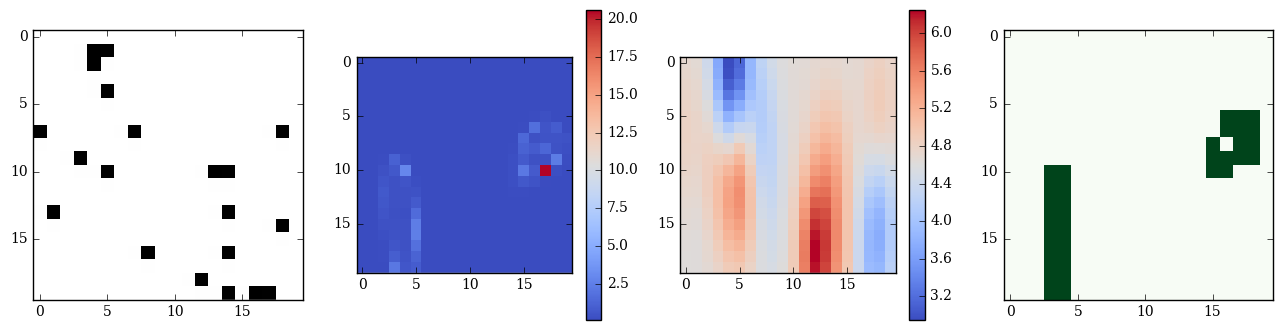

RBF(length_scale=0.306) + WhiteKernel(noise_level=1.99)


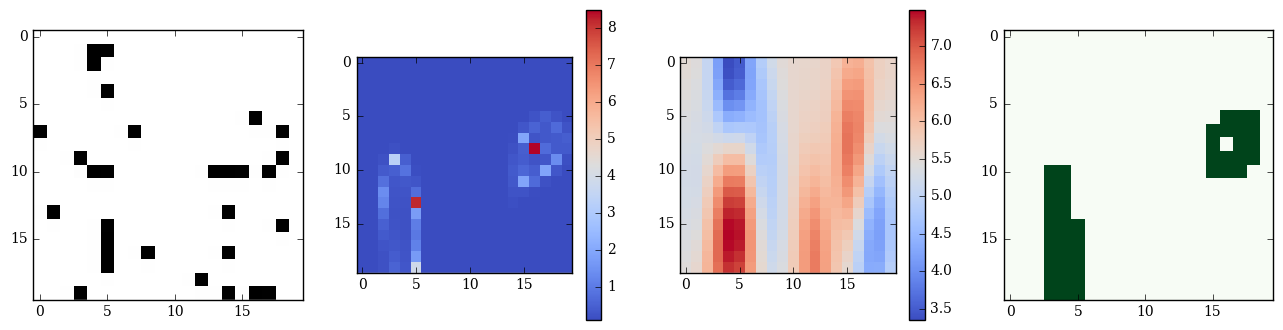

RBF(length_scale=0.269) + WhiteKernel(noise_level=1.56)


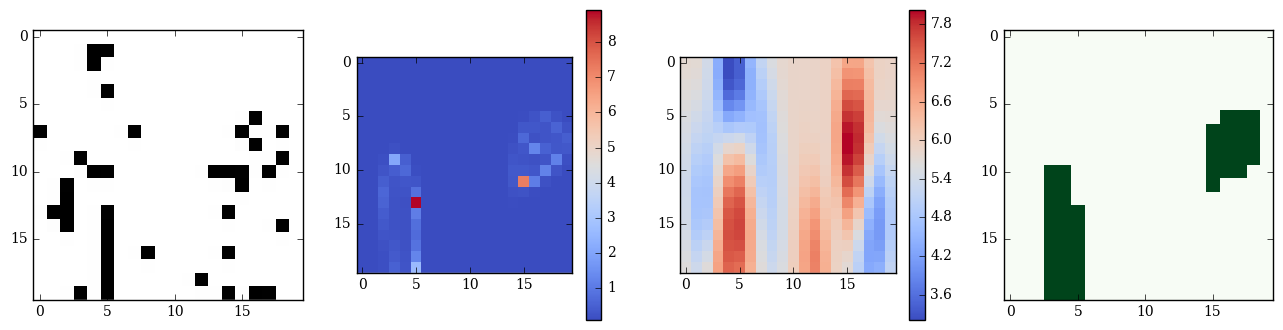

RBF(length_scale=0.263) + WhiteKernel(noise_level=1.4)


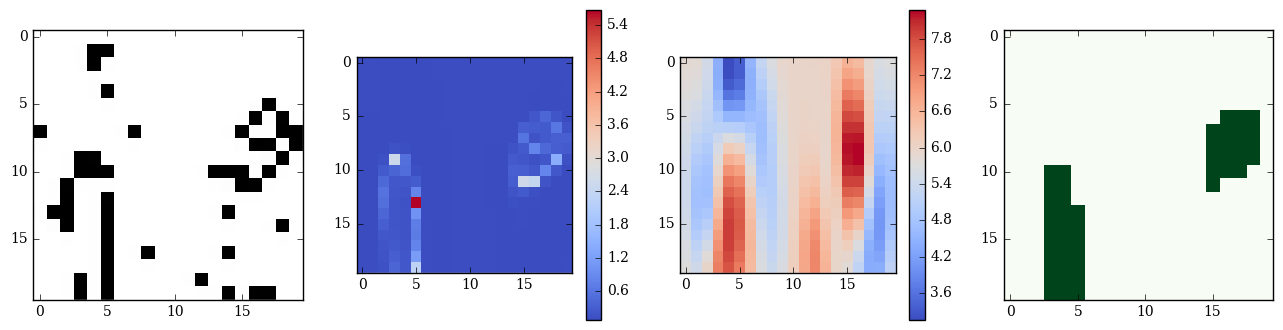

RBF(length_scale=0.251) + WhiteKernel(noise_level=1.11)


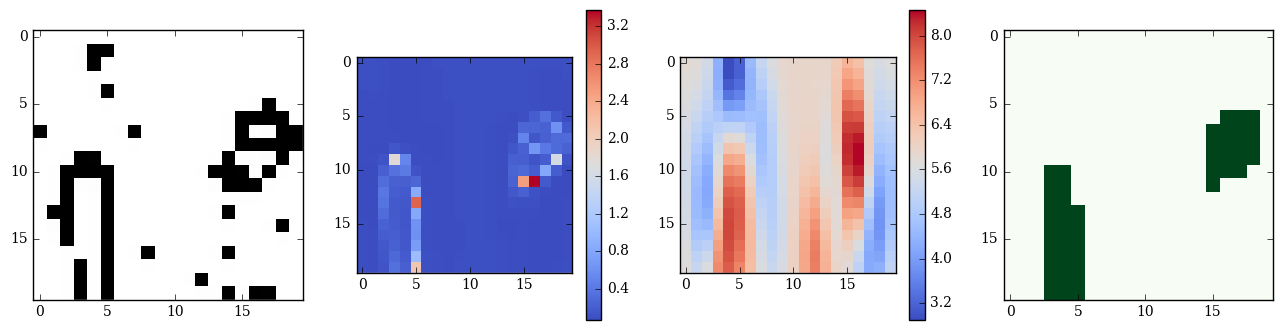

RBF(length_scale=0.251) + WhiteKernel(noise_level=1.15)


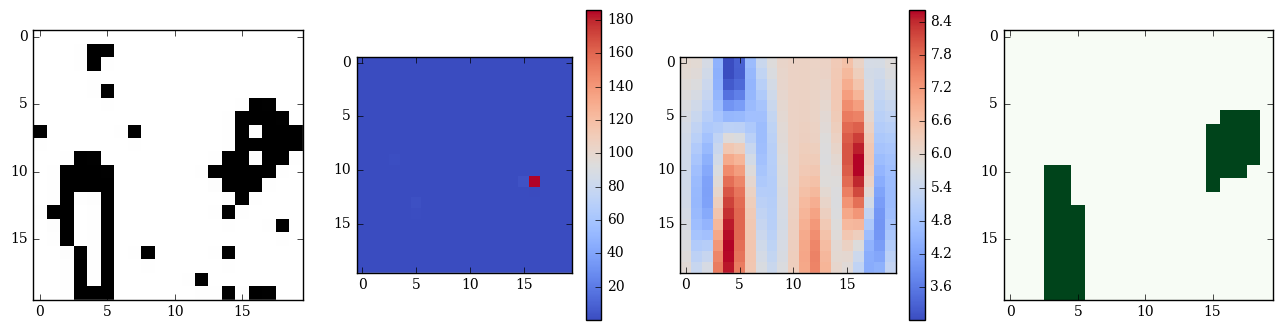

RBF(length_scale=0.248) + WhiteKernel(noise_level=1)


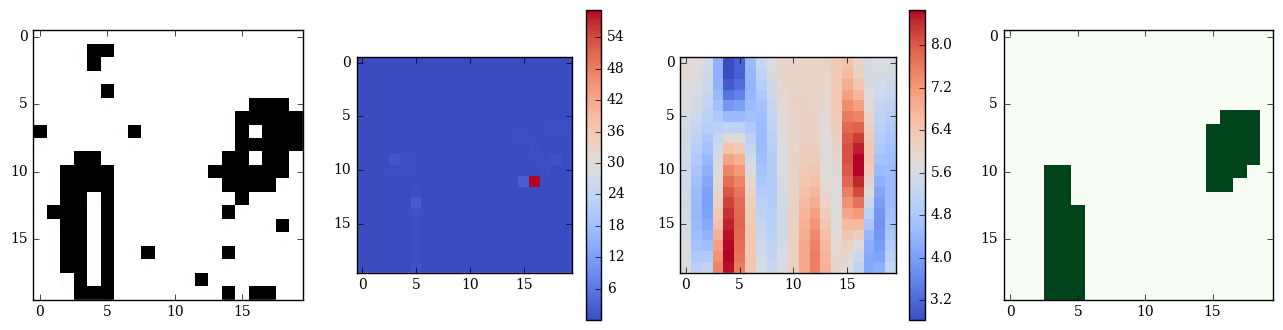

RBF(length_scale=0.244) + WhiteKernel(noise_level=0.919)


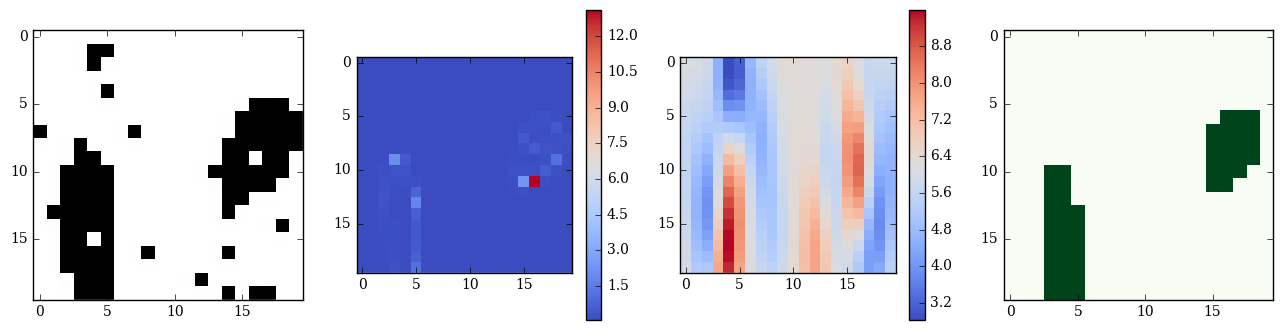

RBF(length_scale=0.233) + WhiteKernel(noise_level=0.863)


(array([[ 6.11566044,  6.10855349,  5.87296865,  4.60598649,  2.83755372,
          3.1407024 ,  4.72256143,  5.52962657,  5.96020701,  6.23945111,
          6.30553111,  6.31124631,  6.28836951,  6.21118758,  6.37463135,
          6.61880969,  6.10790975,  5.72122822,  5.82513763,  5.85244579],
        [ 6.05045722,  6.0356313 ,  5.80641789,  4.57624581,  2.82570463,
          3.10668272,  4.6103831 ,  5.34873861,  5.85143579,  6.21549106,
          6.30375753,  6.3123262 ,  6.28054181,  6.1615549 ,  6.36246616,
          6.76207501,  6.21290876,  5.67857275,  5.7110589 ,  5.71014908],
        [ 5.97677415,  5.94635795,  5.7315005 ,  4.62321417,  3.00285297,
          3.23748354,  4.55351668,  5.16120473,  5.73094086,  6.18778038,
          6.30167983,  6.31446345,  6.27247462,  6.0984815 ,  6.332785  ,
          6.93760994,  6.39621796,  5.68284554,  5.59440388,  5.55187399],
        [ 5.89835843,  5.84092108,  5.64279868,  4.73970991,  3.36455553,
          3.53053991,  4.55723262, 

In [19]:
adaptive_search(all_points, target, lr_stats, 20, 8, 10)

**Interpolation**

In [20]:
from scipy.interpolate import griddata

In [21]:
points = np.zeros((20 * 20, 2))
values = np.zeros(20 * 20)
n = 0
for i in range(20):
    for j in range(20):
        points[n, 0] = i * 1.0 / 20
        points[n, 1] = j * 1.0 / 20
        values[n] = contour_thres[i, j]
        n += 1

In [22]:
res = 50
grid = np.zeros((res * res, 2))
n = 0
for i in range(res):
    for j in range(res):
        grid[n, 0] = i * 1.0 / res
        grid[n, 1] = j * 1.0 / res
        n += 1

In [23]:
grid_smooth = griddata(points, values, grid, method='linear')

In [24]:
contour_thres_smooth = grid_smooth.reshape((res, res))

In [25]:
temp = contour_thres_smooth[np.isnan(contour_thres_smooth) == False]

In [26]:
contour_thres_smooth = temp.reshape((48, 48))

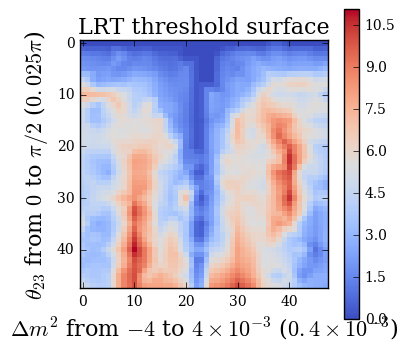

In [28]:
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(contour_thres_smooth, cmap='coolwarm', interpolation='none')
plt.colorbar(im)
plt.title('LRT threshold surface', fontsize=16)
plt.ylabel(r'$\theta_{23}$ from $0$ to $\pi/2$ ($0.025\pi$)', fontsize=16)
plt.xlabel(r'$\Delta m^2$ from $-4$ to $4\times10^{-3}$ ($0.4\times10^{-3}$)', fontsize=16)
plt.show()

In [29]:
points = np.zeros((20 * 20, 2))
values = np.zeros(20 * 20)
n = 0
for i in range(20):
    for j in range(20):
        points[n, 0] = i * 1.0 / 20
        points[n, 1] = j * 1.0 / 20
        values[n] = contour_stat[i, j]
        n += 1

In [30]:
res = 50
grid = np.zeros((res * res, 2))
n = 0
for i in range(res):
    for j in range(res):
        grid[n, 0] = i * 1.0 / res
        grid[n, 1] = j * 1.0 / res
        n += 1

In [31]:
grid_smooth = griddata(points, values, grid, method='linear')

In [32]:
contour_stat_smooth = grid_smooth.reshape((res, res))

In [33]:
temp = contour_stat_smooth[np.isnan(contour_stat_smooth) == False]

In [34]:
contour_stat_smooth = temp.reshape((48, 48))

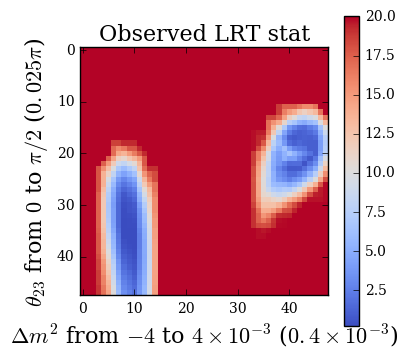

In [36]:
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(contour_stat_smooth, cmap='coolwarm', interpolation='none')
plt.colorbar(im)
plt.title('Observed LRT stat', fontsize=16)
plt.ylabel(r'$\theta_{23}$ from $0$ to $\pi/2$ ($0.025\pi$)', fontsize=16)
plt.xlabel(r'$\Delta m^2$ from $-4$ to $4\times10^{-3}$ ($0.4\times10^{-3}$)', fontsize=16)
plt.show()

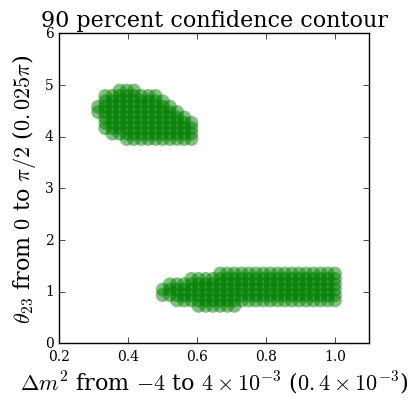

In [37]:
fig = plt.figure(figsize=(4, 4))
conf_array = grid_to_data(contour_stat_smooth < contour_thres_smooth)
conf_array = conf_array[conf_array[:, 2] == 1, :2]
plt.scatter(conf_array[:, 0], conf_array[:, 1], c='g', s=100, alpha=0.5, edgecolor='none')
plt.title('90 percent confidence contour', fontsize=16)
plt.ylabel(r'$\theta_{23}$ from $0$ to $\pi/2$ ($0.025\pi$)', fontsize=16)
plt.xlabel(r'$\Delta m^2$ from $-4$ to $4\times10^{-3}$ ($0.4\times10^{-3}$)', fontsize=16)
plt.show()

In [38]:
data = grid_to_data(contour_thres_smooth)
all_points = data[:, 0:2]
target = data[:, 2]
print(all_points.shape)
print(target.shape)

(2304, 2)
(2304,)


In [39]:
lr_stats = grid_to_data(contour_stat_smooth)[:, 2]

RBF(length_scale=0.316) + WhiteKernel(noise_level=1.67)


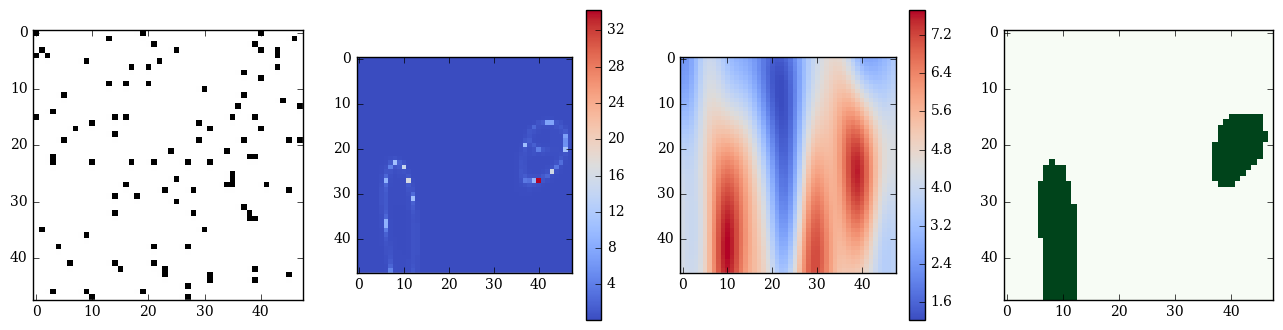

RBF(length_scale=0.265) + WhiteKernel(noise_level=0.722)


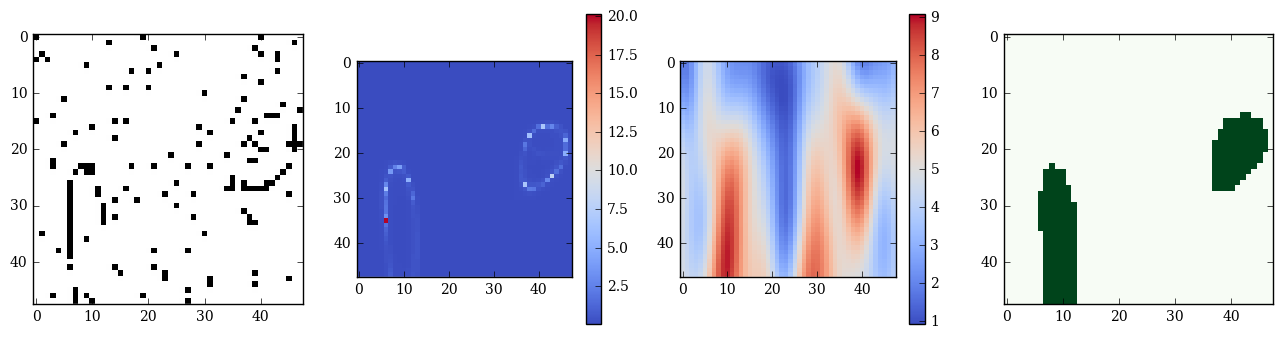

RBF(length_scale=0.263) + WhiteKernel(noise_level=0.51)


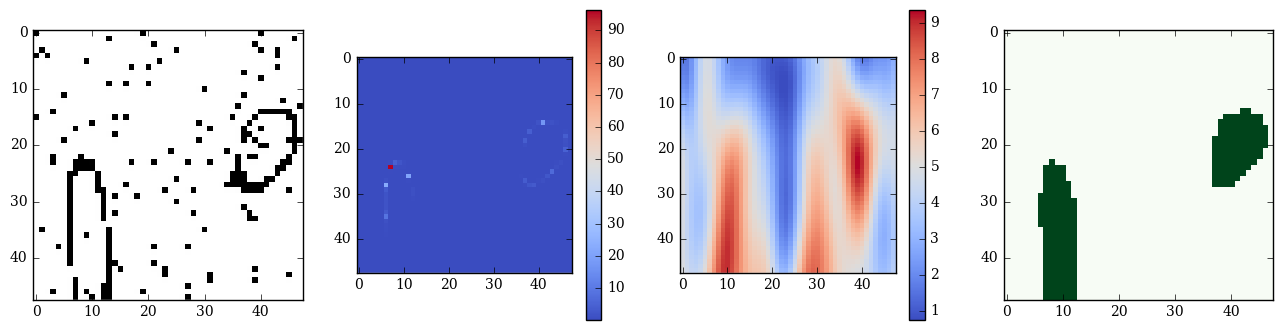

RBF(length_scale=0.254) + WhiteKernel(noise_level=0.446)


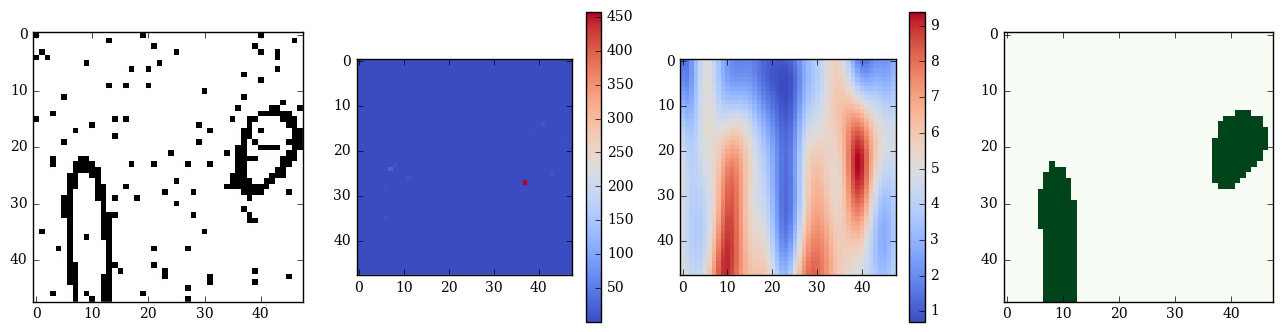

RBF(length_scale=0.253) + WhiteKernel(noise_level=0.404)


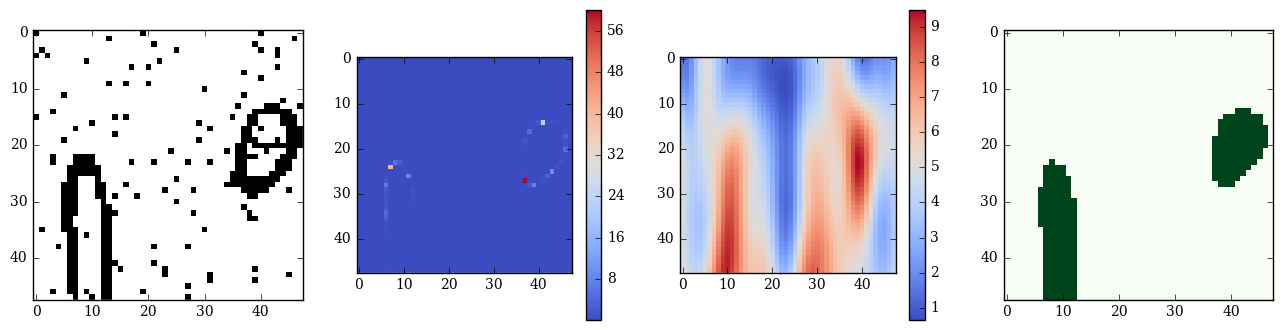

RBF(length_scale=0.249) + WhiteKernel(noise_level=0.359)


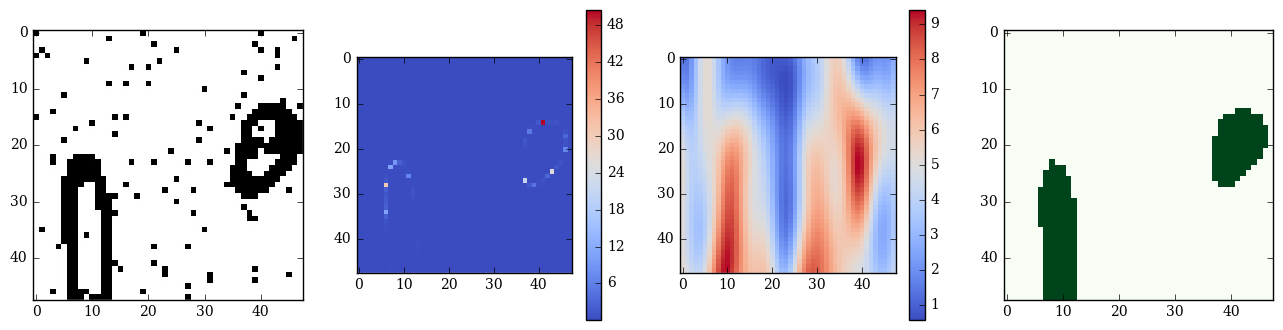

RBF(length_scale=0.249) + WhiteKernel(noise_level=0.349)


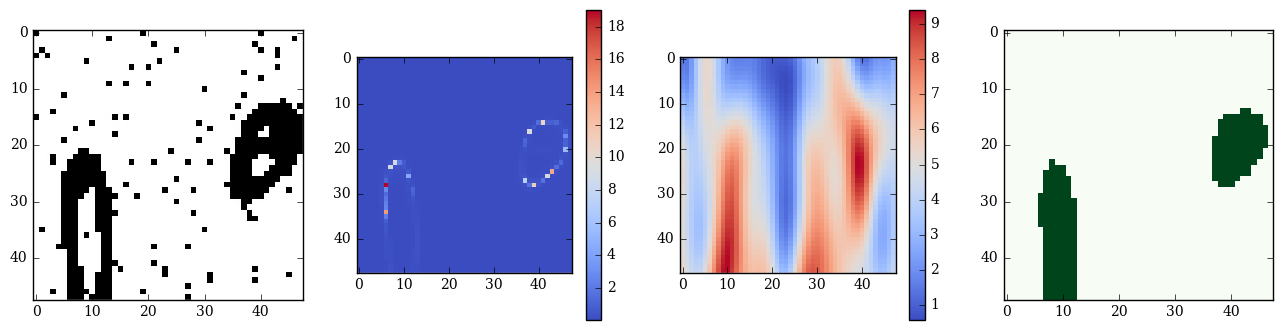

RBF(length_scale=0.243) + WhiteKernel(noise_level=0.332)


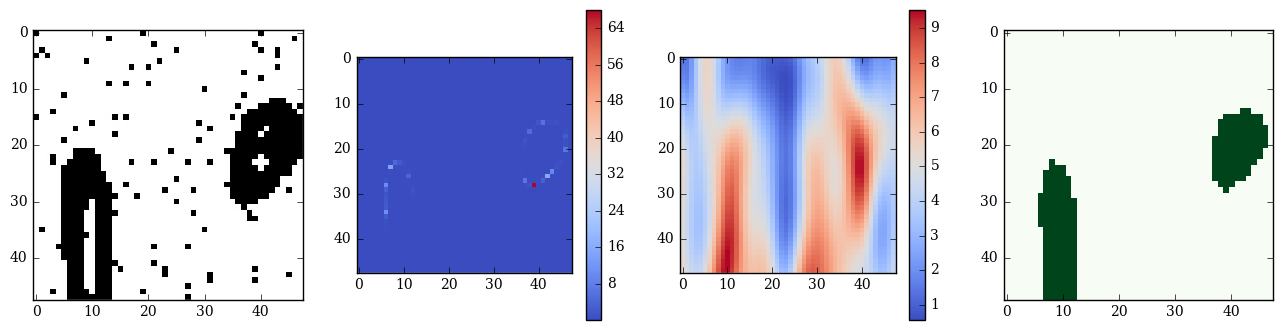

RBF(length_scale=0.239) + WhiteKernel(noise_level=0.314)


(array([[ 1.49863851,  1.49719163,  2.28419917, ...,  2.19368021,
          2.24004974,  2.74862005],
        [ 1.53882886,  1.51129479,  2.27329303, ...,  2.3010102 ,
          2.33567738,  2.82333008],
        [ 1.61580427,  1.55918642,  2.28687842, ...,  2.44274279,
          2.46293813,  2.92373965],
        ..., 
        [ 5.26544762,  4.75854058,  4.2661624 , ...,  3.0668717 ,
          3.49390923,  4.17271374],
        [ 5.31476945,  4.83256122,  4.36616756, ...,  3.20007937,
          3.61066468,  4.26717025],
        [ 5.3674816 ,  4.91145349,  4.47298904, ...,  3.34469018,
          3.73612601,  4.36646608]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]], dtype=bool))

In [40]:
adaptive_search(all_points, target, lr_stats, 100, 8, 50)

**Percentile**

In [41]:
contour_tile = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        stat = contour_stat[i, j]
        reference = np.sort(contour_dist[i, j])
        contour_tile[i, j] = np.searchsorted(reference, stat) / 2

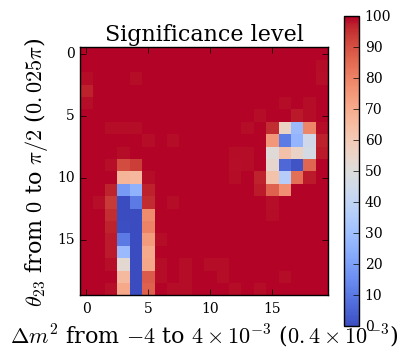

In [42]:
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(contour_tile, cmap='coolwarm', interpolation='none')
plt.colorbar(im)
plt.title('Significance level', fontsize=16)
plt.ylabel(r'$\theta_{23}$ from $0$ to $\pi/2$ ($0.025\pi$)', fontsize=16)
plt.xlabel(r'$\Delta m^2$ from $-4$ to $4\times10^{-3}$ ($0.4\times10^{-3}$)', fontsize=16)
plt.show()

In [43]:
points = np.zeros((20 * 20, 2))
values = np.zeros(20 * 20)
n = 0
for i in range(20):
    for j in range(20):
        points[n, 0] = i * 1.0 / 20
        points[n, 1] = j * 1.0 / 20
        values[n] = contour_tile[i, j]
        n += 1

In [44]:
res = 50
grid = np.zeros((res * res, 2))
n = 0
for i in range(res):
    for j in range(res):
        grid[n, 0] = i * 1.0 / res
        grid[n, 1] = j * 1.0 / res
        n += 1

In [45]:
grid_smooth = griddata(points, values, grid, method='linear')

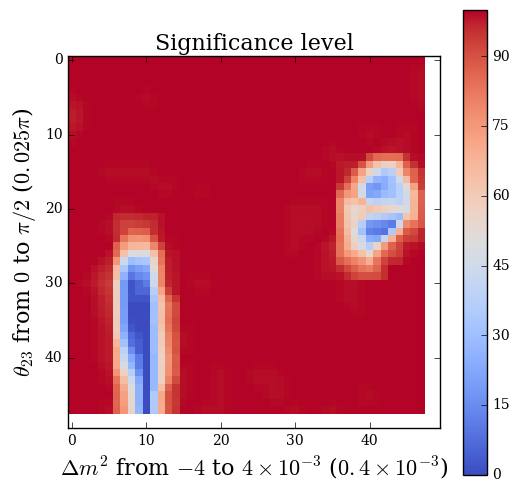

In [46]:
fig = plt.figure(figsize=(6, 6))
im = plt.imshow(grid_smooth.reshape((res, res)), cmap='coolwarm', interpolation='none')
plt.colorbar(im)
plt.title('Significance level', fontsize=16)
plt.ylabel(r'$\theta_{23}$ from $0$ to $\pi/2$ ($0.025\pi$)', fontsize=16)
plt.xlabel(r'$\Delta m^2$ from $-4$ to $4\times10^{-3}$ ($0.4\times10^{-3}$)', fontsize=16)
plt.show()